In [1]:
#导入sklearn包
import sklearn

#输出sklearn的版本号
sklearn.__version__

'1.0.2'

In [2]:
#导入所需要的包
from sklearn import datasets
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [3]:
#导入数据
iris = datasets.load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
#将数据降维2维
svd = TruncatedSVD(n_components=2)
emb = svd.fit_transform(iris['data'])  

In [5]:
print(emb)

[[ 5.91274714e+00  2.30203322e+00]
 [ 5.57248242e+00  1.97182599e+00]
 [ 5.44697714e+00  2.09520636e+00]
 [ 5.43645948e+00  1.87038151e+00]
 [ 5.87564494e+00  2.32829018e+00]
 [ 6.47759822e+00  2.32464996e+00]
 [ 5.51597520e+00  2.07090423e+00]
 [ 5.85092859e+00  2.14807482e+00]
 [ 5.15891972e+00  1.77506408e+00]
 [ 5.64500117e+00  1.99000106e+00]
 [ 6.26539771e+00  2.42576813e+00]
 [ 5.75200785e+00  2.02037338e+00]
 [ 5.48058085e+00  1.97777558e+00]
 [ 4.95112411e+00  2.04828749e+00]
 [ 6.52596417e+00  2.91606081e+00]
 [ 6.79037199e+00  2.82500759e+00]
 [ 6.27239468e+00  2.60811578e+00]
 [ 5.92953789e+00  2.26766614e+00]
 [ 6.64813130e+00  2.38959506e+00]
 [ 6.09486463e+00  2.36082303e+00]
 [ 6.25397363e+00  2.12001187e+00]
 [ 6.07364677e+00  2.27178150e+00]
 [ 5.36999813e+00  2.49808604e+00]
 [ 6.04100482e+00  1.87698371e+00]
 [ 5.90591050e+00  1.80777402e+00]
 [ 5.75019501e+00  1.85851056e+00]
 [ 5.93581099e+00  2.00847420e+00]
 [ 6.03915884e+00  2.25958425e+00]
 [ 5.94984934e+00  2

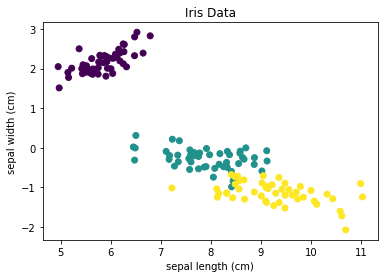

In [6]:
#绘图查看数据分布
plt.scatter(emb[:,0],emb[:,1],c=iris['target'])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Iris Data")
plt.show()

In [7]:
#训练集、测试集划分

from sklearn import model_selection
train, test, t_train, t_test = model_selection.train_test_split(iris['data'], iris['target'], test_size=0.3, random_state=42)

In [8]:
#输出训练集、测试集，以及训练集、测试集标签的维度
print(train.shape)
print(test.shape)
print(t_train.shape)
print(t_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [9]:
#使用决策树分类
from sklearn import tree
clf = tree.DecisionTreeClassifier()

#训练模型
clf = clf.fit(train,t_train)

In [10]:
#对测试集分类
res = clf.predict(test)

In [11]:
print(res)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [12]:
#对结果进行评估
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(t_test,res)
confmat

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(t_test,res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
##决策树可视化
#需安装 graphviz
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None) 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

print(dot_data)

graph = graphviz.Source(dot_data) 
graph.render("iris")

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<petal width (cm) &le; 0.8<br/>gini = 0.664<br/>samples = 105<br/>value = [31, 37, 37]<br/>class = versicolor>, fillcolor="#ffffff"] ;
1 [label=<gini = 0.0<br/>samples = 31<br/>value = [31, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.5<br/>samples = 74<br/>value = [0, 37, 37]<br/>class = versicolor>, fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.214<br/>samples = 41<br/>value = [0, 36, 5]<br/>class = versicolor>, fillcolor="#54e992"] ;
2 -> 3 ;
4 [label=<petal width (cm) &le; 1.6<br/>gini = 0.056<br/>samples = 35<br/>value = [0, 34, 1]<br/>class = versicolor>, fillcolor="#3fe685"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 34<br/>value = [0, 34

'iris.pdf'